# Cellular Automata Pathfinder
## Using A*
### Soren Gran / August 2019

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [33]:
class Roomba():
    '''
    This class creates the Roomba that does the actual pathfinding. I named the pathfinder a Roomba
    because this project reminded me of an assignment I did to design a Roomba that cleaned a grid room.
    Roomba() is initialized by Room()'s start_simulation() method. Because of this, Roomba takes Room's
    room grid, starting point, and ending point.
    
    The Roomba uses A* search to find the optimal path between the starting point and the ending point
    around the obstacles. This is an informed search algorithm because the pathfinder is aware of the starting
    and ending points, meaning the pathfinder does not have to move aimlessly until it finds the end point.
    Instead, it is aware of its destination and therefore the direction in which it should move to reach its
    destination optimally.
    
    Methods:
        __init__(self, room, starting_point, ending_point) - takes the room grid, the starting point,
            and the ending point from the room class.
        get_neighbors(self) - gets the neighbors of the pathfinder's current position. Returns a list
            of the neighbors.
        update(self) - The main function for the pathfinder. If we are not at the destination, we 
    
    '''
    def __init__(self, room, starting_point, ending_point):
        # all three inputs come from the Room() class.
        self.room = room
        self.starting_point = starting_point
        self.start_x, self.start_y = self.starting_point
        
        self.ending_point = ending_point
        self.end_x, self.end_y = self.ending_point
        
        # we initialize our position as the starting point
        self.x_coord, self.y_coord = self.starting_point
        
        self.path = []
        
        self.previous_cell = self.starting_point
        
        self.arrived = False
        
    
    def get_neighbors(self):
        '''
        This method gets the neighbors surrounding the current square. This method does not return neighbors
        that are obstacles. If the current square is on the edge of the grid, the method only returns neighbors
        on the grid.
        '''
        neighbors = []
        # we need to look at the 8 possible neighbors surrounding the current square
        for x in [self.x_coord + 1, self.x_coord, self.x_coord - 1]:
            if 0 <= x < len(self.room[0]): # we need to make sure we are in the grid
                for y in [self.y_coord + 1, self.y_coord, self.y_coord - 1]:
                    if 0 < y < len(self.room):
                        if x != self.x_coord or y != self.y_coord: # we don't want to return the present square
                            if self.room[y][x] != 10: # we also don't want to return obstacles
                                neighbors.append((x,y))
        return neighbors
    

    def update(self):
        '''
        This method describes what the pathfinder does at every step.
            -Check if we are at the destination. (If we are, we are done.)
            -If the current square is not 
        '''
        if self.y_coord == self.end_y and self.x_coord == self.end_x: # if we are at the destination
            print('Success!') # we are done
            self.room[self.y_coord][self.x_coord] = 15
            self.arrived = True
            return self.path
        if self.room[self.y_coord][self.x_coord] != 20:
            self.room[self.y_coord][self.x_coord] = 15
        # now we need to decide what cell to go to next
        scores = []
        neighbors = self.get_neighbors() # we get the neighboring cells
        for neighbor in neighbors:
            x_neighbor, y_neighbor = neighbor # the coordinates of the neighbor
            if x_neighbor == self.end_x and y_neighbor == self.end_y: # if we are next to the destination
                self.x_coord, self.y_coord = self.end_x, self.end_y # we go directly to the destination
                self.path.append((self.x_coord, self.y_coord)) # and add it to our path
                break
            else: # otherwise
                self.room[y_neighbor][x_neighbor] = 5 # the neighbor becomes a considered cell
                s_score = abs(x_neighbor - self.start_x) + abs(y_neighbor - self.start_y) # the s score represents
                # the distance from the current cell to the start cell
                e_score = abs(x_neighbor - self.end_x) + abs(y_neighbor - self.end_y) # the e score represents
                # the distance from the current cell to the end cell
                score = s_score + (e_score)**2 # we weight the e score more heavily because if the s score and e
                # score are evenly weighted, then cells in a straight line between the start and end would all
                # have the same scores and we would have no way of deciding which direction to go. So we make
                # the scores decrease as we approach the destination so our pathfinder is motivated to move in
                # that direction.
                scores.append(score)
        if self.x_coord != self.end_x or self.y_coord != self.end_y: # as long as we haven't reached the destination
            winner = min(scores) # we get the lowest score corresponding to the optimal next cell
            new_cell = scores.index(winner) # we get that score's index so we can get the right neighbor
            self.x_coord, self.y_coord = neighbors[new_cell] # the best neighbor becomes our next cell
            self.path.append((self.x_coord, self.y_coord)) # we add that to the path
        


class Room():
    '''
    This class creates the room that the pathfinding Roomba must navigate through.
    Methods:
        __init__(self, length, width, density)
        display(self)
        final(self, path)
        start_simulation(self)
    '''
    def __init__(self, length, width, density, cap):
        '''
        The user gets to select the length and width of the room, as well as the density of obstacles,
        which will be randomly distributed. The user also selects the cap which refers to the maximum
        number of steps the pathfinder is allowed to take.
        
        The room is a list of lists of numbers. The number denotes that cell's status.
        0 = empty, unvisited cell
        5 = cells we have considered because they were neighboring
        10 = obstacle
        15 = our current position
        20 = starting and ending points. Also denotes our path in the final display.
        '''
        self.length = length
        self.width = width
        self.density = density
        self.cap = cap
        
        # distributing the obstacles
        self.num_obstacles = round(length*width*density)
        self.room = np.zeros(self.length * self.width)
        for i in range(self.num_obstacles):
            self.room[i] = 10 # obstacles are marked by 10
        np.random.shuffle(self.room)
        self.room = self.room.reshape(self.width, self.length)
        
        # starting point
        y_guess = np.random.choice(range(len(self.room))) # random row
        x_guess = np.random.choice(range(len(self.room[0]))) # random column
        while self.room[y_guess][x_guess] == 10: # as long as this position is an obstacle
            y_guess = np.random.choice(range(len(self.room))) # we try again
            x_guess = np.random.choice(range(len(self.room[0])))
        self.y_coord = y_guess
        self.x_coord = x_guess
        
        self.room[self.y_coord][self.x_coord] = 20 # marking our starting point
        
        self.starting_point = (int(self.x_coord), int(self.y_coord))
        
        # ending point
        y_guess = np.random.choice(range(len(self.room))) # random row
        x_guess = np.random.choice(range(len(self.room[0]))) # random column
        while self.room[y_guess][x_guess] == 10: # as long as this position is not an obstacle
            y_guess = np.random.choice(range(len(self.room)))
            x_guess = np.random.choice(range(len(self.room[0])))
        self.y_coord = y_guess
        self.x_coord = x_guess
        
        self.room[self.y_coord][self.x_coord] = 20 # marking our ending point
        
        self.ending_point = (int(self.x_coord), int(self.y_coord))
        
        self.steps = 0
    
    def display(self): # displays the room using matplotlib
        plt.imshow(self.room)
        plt.show()
        
    def final(self, path): # makes the final path the same color so it is visible in the final display
        for point in path:
            x, y = point
            self.room[y][x] = 20
    
    def start_simulation(self):
        my_roomba = Roomba(self.room, self.starting_point, self.ending_point) # initializes the pathfinder
        self.display() # displays our initial room
        while my_roomba.arrived == False and self.steps < self.cap: # the steps cap is arbitrary and exists in case
            # of bugs. It should be changed if the dimensions of the room are larger because the number of
            # expected steps will increase.
            my_roomba.update()
            self.display()
            print(self.room)
            self.steps += 1
        if my_roomba.arrived == True:
            print(my_roomba.path)
            print('It took us %s steps to arrive' % self.steps)
            self.final(my_roomba.path) # makes our final path 20s for display purposes
            self.display()

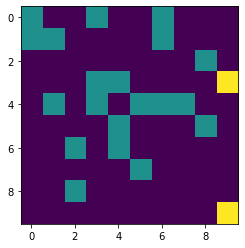

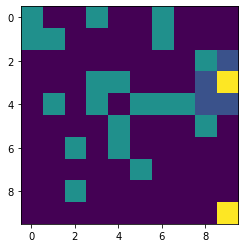

[[10.  0.  0. 10.  0.  0. 10.  0.  0.  0.]
 [10. 10.  0.  0.  0.  0. 10.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 10.  5.]
 [ 0.  0.  0. 10. 10.  0.  0.  0.  5. 20.]
 [ 0. 10.  0. 10.  0. 10. 10. 10.  5.  5.]
 [ 0.  0.  0.  0. 10.  0.  0.  0. 10.  0.]
 [ 0.  0. 10.  0. 10.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 10.  0.  0.  0.  0.]
 [ 0.  0. 10.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 20.]]


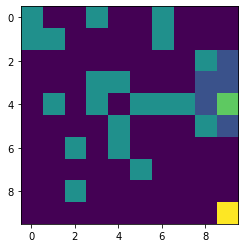

[[10.  0.  0. 10.  0.  0. 10.  0.  0.  0.]
 [10. 10.  0.  0.  0.  0. 10.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 10.  5.]
 [ 0.  0.  0. 10. 10.  0.  0.  0.  5.  5.]
 [ 0. 10.  0. 10.  0. 10. 10. 10.  5. 15.]
 [ 0.  0.  0.  0. 10.  0.  0.  0. 10.  5.]
 [ 0.  0. 10.  0. 10.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 10.  0.  0.  0.  0.]
 [ 0.  0. 10.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 20.]]


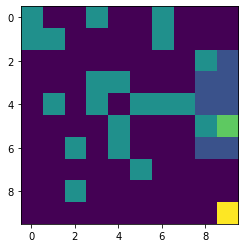

[[10.  0.  0. 10.  0.  0. 10.  0.  0.  0.]
 [10. 10.  0.  0.  0.  0. 10.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 10.  5.]
 [ 0.  0.  0. 10. 10.  0.  0.  0.  5.  5.]
 [ 0. 10.  0. 10.  0. 10. 10. 10.  5.  5.]
 [ 0.  0.  0.  0. 10.  0.  0.  0. 10. 15.]
 [ 0.  0. 10.  0. 10.  0.  0.  0.  5.  5.]
 [ 0.  0.  0.  0.  0. 10.  0.  0.  0.  0.]
 [ 0.  0. 10.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 20.]]


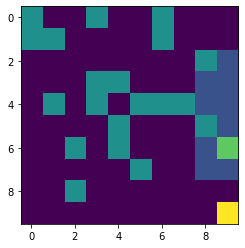

[[10.  0.  0. 10.  0.  0. 10.  0.  0.  0.]
 [10. 10.  0.  0.  0.  0. 10.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 10.  5.]
 [ 0.  0.  0. 10. 10.  0.  0.  0.  5.  5.]
 [ 0. 10.  0. 10.  0. 10. 10. 10.  5.  5.]
 [ 0.  0.  0.  0. 10.  0.  0.  0. 10.  5.]
 [ 0.  0. 10.  0. 10.  0.  0.  0.  5. 15.]
 [ 0.  0.  0.  0.  0. 10.  0.  0.  5.  5.]
 [ 0.  0. 10.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 20.]]


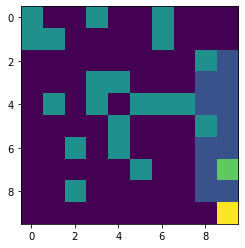

[[10.  0.  0. 10.  0.  0. 10.  0.  0.  0.]
 [10. 10.  0.  0.  0.  0. 10.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 10.  5.]
 [ 0.  0.  0. 10. 10.  0.  0.  0.  5.  5.]
 [ 0. 10.  0. 10.  0. 10. 10. 10.  5.  5.]
 [ 0.  0.  0.  0. 10.  0.  0.  0. 10.  5.]
 [ 0.  0. 10.  0. 10.  0.  0.  0.  5.  5.]
 [ 0.  0.  0.  0.  0. 10.  0.  0.  5. 15.]
 [ 0.  0. 10.  0.  0.  0.  0.  0.  5.  5.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 20.]]


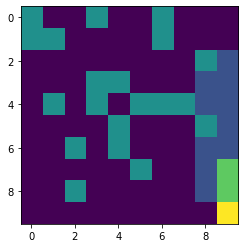

[[10.  0.  0. 10.  0.  0. 10.  0.  0.  0.]
 [10. 10.  0.  0.  0.  0. 10.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 10.  5.]
 [ 0.  0.  0. 10. 10.  0.  0.  0.  5.  5.]
 [ 0. 10.  0. 10.  0. 10. 10. 10.  5.  5.]
 [ 0.  0.  0.  0. 10.  0.  0.  0. 10.  5.]
 [ 0.  0. 10.  0. 10.  0.  0.  0.  5.  5.]
 [ 0.  0.  0.  0.  0. 10.  0.  0.  5. 15.]
 [ 0.  0. 10.  0.  0.  0.  0.  0.  5. 15.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 20.]]
Success!


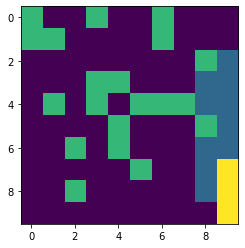

[[10.  0.  0. 10.  0.  0. 10.  0.  0.  0.]
 [10. 10.  0.  0.  0.  0. 10.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 10.  5.]
 [ 0.  0.  0. 10. 10.  0.  0.  0.  5.  5.]
 [ 0. 10.  0. 10.  0. 10. 10. 10.  5.  5.]
 [ 0.  0.  0.  0. 10.  0.  0.  0. 10.  5.]
 [ 0.  0. 10.  0. 10.  0.  0.  0.  5.  5.]
 [ 0.  0.  0.  0.  0. 10.  0.  0.  5. 15.]
 [ 0.  0. 10.  0.  0.  0.  0.  0.  5. 15.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 15.]]
[(9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]
It took us 7 steps to arrive


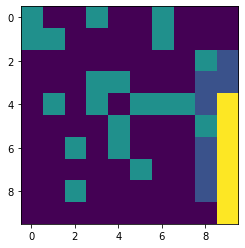

In [34]:
my_simulation = Room(10, 10, .2, 500)
my_simulation.start_simulation()